In [32]:
# import numpy as np
import array_api_strict as np
import matplotlib.pyplot as plt
def render(imgsize):
    y, x = np.ogrid[1 : -1 : imgsize * 2j, -1 : 1 : imgsize * 2j]
    z = x + y * 1j

    vectorized_iterate = np.vectorize(iterate)
    img = vectorized_iterate(z)

    # Normalize the image data to be between 0 and 1
    if np.isnan(img).any():
        print("NaN values detected in img, which will affect normalization.")
        img = np.nan_to_num(img) 
    if np.max(img) != np.min(img):
        img = (img - np.min(img)) / (np.max(img) - np.min(img))
    else:
        img = np.zeros(img.shape)

    colormaps = ['hot', 'plasma', 'inferno', 'twilight']
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    for ax, cmap in zip(axes.flatten(), colormaps):
        ax.imshow(img, cmap=cmap)
        ax.axis("off")
        ax.set_title(cmap)

    plt.tight_layout()
    plt.show()

# Define the complex function and its derivative manually.
def f(z):
    return z**3 - 1

def df(z):
    return 3*z**2

# Iteration function using NumPy operations.
def iterate(z):
    for iteration in range(50):  # Max iterations
        dz = df(z)
        with np.errstate(all='ignore'):
            z_new = z - f(z) / dz # simplify this by hand
            if np.all(np.abs(z_new - z) < 1e-4):
                break
            z = z_new
    return iteration

# which root it converges too, not iterations
# screen should show 3 colors, every point converges to one of 3 roots
# add an assertion that the point did converge to a root
# root of 1, and root of -1/2 + sqrt(3)/2i, and -1/2 - sqrt(3)/2i
# np.angle(z) / 2pi --> which root its closest too, fractional number to convert to 0,1,2
# just 3 colors, gray, black, white (for example), show that it is going to converge to one of these roots

# once done with cubic, generalize it to any complex degree
# compute where each pixel is going, compute ordinal number, compute an array with a pixel

In [33]:
render(imgsize=600)

AttributeError: module 'array_api_strict' has no attribute 'ogrid'

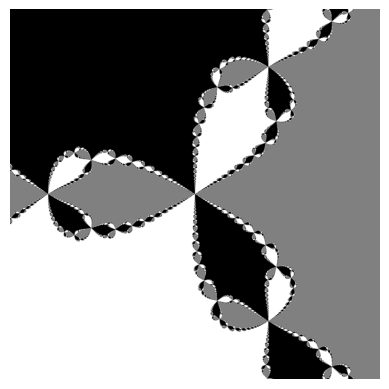

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def find_roots(degree):
    """Find the roots of unity for a given degree."""
    return np.array([np.exp(2j * np.pi * k / degree) for k in range(degree)])

def f(z, degree):
    return z**degree - 1

def df(z, degree):
    return degree*z**(degree-1)

def iterate(z, roots):
    degree = len(roots)
    for iteration in range(50):  # Max iterations
        dz = df(z, degree)
        with np.errstate(all='ignore'):
            z_new = z - f(z, degree) / dz
            if np.all(np.abs(z_new - z) < 1e-4):
                break
            z = z_new
    # Measure distance to each root and find the closest one
    distances = np.abs(z - roots[:, np.newaxis])
    closest_root = np.argmin(distances, axis=0)
    # Check convergence to a root
    # converged = np.min(distances, axis=0) < 1e-4
    #assert np.all(converged), "Some points did not converge to a root"
    return closest_root

def render(imgsize, degree):
    roots = find_roots(degree)
    y, x = np.ogrid[1 : -1 : imgsize * 2j, -1 : 1 : imgsize * 2j]
    z = x + y * 1j

    vectorized_iterate = np.vectorize(iterate, excluded=['roots'])
    img = vectorized_iterate(z, roots=roots)

    # Simple color mapping for visualization
    img_color = np.select([img == 0, img == 1, img == 2], [0.5, 0, 1], default=np.nan)

    plt.imshow(img_color, cmap='gray')
    plt.axis("off")
    plt.show()

# Example usage for cubic roots
render(imgsize=1000, degree=3)


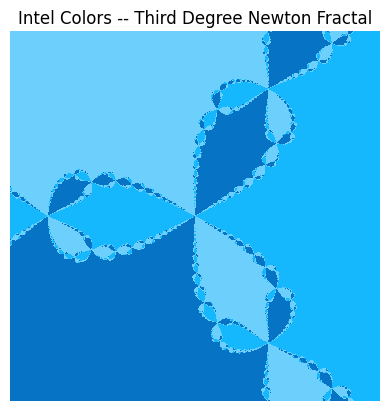

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def find_roots(degree):
    """Find the roots of unity for a given degree."""
    return np.array([np.exp(2j * np.pi * k / degree) for k in range(degree)])

def f(z, degree):
    return z**degree - 1

def df(z, degree):
    return degree*z**(degree-1)

def iterate(z, roots):
    degree = len(roots)
    for iteration in range(50):  # Max iterations
        dz = df(z, degree)
        with np.errstate(all='ignore'):
            z_new = z - f(z, degree) / dz
            if np.all(np.abs(z_new - z) < 1e-4):
                break
            z = z_new
    # Measure distance to each root and find the closest one
    distances = np.abs(z - roots[:, np.newaxis])
    closest_root = np.argmin(distances, axis=0)
    # Check convergence to a root
    # converged = np.min(distances, axis=0) < 1e-4
    #assert np.all(converged), "Some points did not converge to a root"
    return closest_root

def render(imgsize, degree):
    roots = find_roots(degree)
    y, x = np.ogrid[1 : -1 : imgsize * 2j, -1 : 1 : imgsize * 2j]
    z = x + y * 1j

    vectorized_iterate = np.vectorize(iterate, excluded=['roots'])
    img = vectorized_iterate(z, roots=roots)

    # INTEL color mapping for visualization
    hex_colors = ['#15b8fc', '#6ccffc', '#0773c4']
    cmap = ListedColormap(hex_colors)

    plt.imshow(img, cmap=cmap)
    plt.title("Intel Colors -- Third Degree Newton Fractal")
    plt.axis("off")
    plt.show()

# Example usage for cubic roots
render(imgsize=1000, degree=3)
